c:\Users\gacha\PycharmProjects\LSTMS\.venv\Lib\site-packages\keras\src\layers\rnn\rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/10
30/30 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.1537
Epoch 2/10
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - loss: 0.0213
Epoch 3/10
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 0.0015
Epoch 4/10
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - loss: 2.9638e-04
Epoch 5/10
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - loss: 1.1376e-04
Epoch 6/10
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - loss: 7.6930e-05
Epoch 7/10
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step - loss: 6.7487e-05
Epoch 8/10
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step - loss: 6.1867e-05
Epoch 9/10
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 5.7349e-05
Epoch 10/10
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - loss: 5.3510e-05
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step


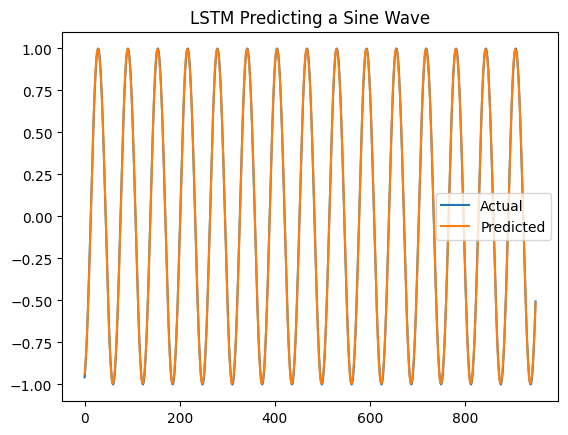

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import LSTM, Dense
from sklearn.preprocessing import MinMaxScaler

# Generate sine wave data
x = np.linspace(0, 100, 1000)
data = np.sin(x)

# Normalize
scaler = MinMaxScaler()
data_scaled = scaler.fit_transform(data.reshape(-1, 1))

# Prepare training data
def create_sequences(data, seq_length):
    X, y = [], []
    for i in range(len(data) - seq_length):
        X.append(data[i:i + seq_length])
        y.append(data[i + seq_length])
    return np.array(X), np.array(y)

seq_length = 50
X, y = create_sequences(data_scaled, seq_length)

X = X.reshape((X.shape[0], X.shape[1], 1))

# Build LSTM model
model = Sequential()
model.add(LSTM(50, activation='tanh', input_shape=(seq_length, 1)))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse')

# Train
model.fit(X, y, epochs=10, verbose=1)

# Predict
predicted = model.predict(X)
predicted = scaler.inverse_transform(predicted)

# Plot
plt.plot(data[seq_length:], label='Actual')
plt.plot(predicted, label='Predicted')
plt.legend()
plt.title('LSTM Predicting a Sine Wave')
plt.show()
